In [63]:
!pip install yfinance

     ---------------------------------------- 0.0/939.5 kB ? eta -:--:--
     ------------------------------------- 939.5/939.5 kB 42.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.7-py3-none-any.whl size=138951 sha256=af98ed091eecd352a8a8164ad94de29bb77a90d1239dbde73401bc8cd2797e5f
  Stored in directory: c:\users\chane\appdata\local\pip\cache\wheels\d8\b7\b5\bc5cfc21613ff88ce55cf4151a9f32e23bd8f4a2c4d51e7c8b
Successfully built peewee


In [1]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import norm
from sklearn.metrics import pairwise_distances

In [13]:
def sliding_window(data, window_size, step_size):
    # Découpe la série temporelle en fenêtres de taille `window_size`
    return np.array([data[i:i + window_size] for i in range(0, len(data) - window_size + 1, step_size)])

def project_data(data, directions):
    # Applique des projections aléatoires pour obtenir des distances Wasserstein en 1D
    projected = []
    for theta in directions:
        proj = np.dot(data, theta)
        projected.append(proj)
    return np.array(projected).T

def sliced_wasserstein_distance(X, Y, n_projections=10):
    # Calcule la distance Wasserstein "sliced" en projetant les données
    directions = np.random.randn(n_projections, X.shape[1])
    directions /= np.linalg.norm(directions, axis=1)[:, np.newaxis]
    
    X_proj = project_data(X, directions)
    Y_proj = project_data(Y, directions)
    
    distances = []
    for i in range(n_projections):
        X_sorted = np.sort(X_proj[:, i])
        Y_sorted = np.sort(Y_proj[:, i])
        distances.append(np.mean(np.abs(X_sorted - Y_sorted)))
    return np.mean(distances)

def sWk_means_clustering(data, n_clusters=2, window_size=10, step_size=5, n_projections=10, tol=1e-6, max_iter=100):
    # Découpe les données en fenêtres
    windows = sliding_window(data, window_size, step_size)
    # Aplati chaque fenêtre pour rendre les données bidimensionnelles
    windows_flat = windows.reshape(windows.shape[0], -1)
    
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=max_iter, tol=tol)
    
    # Calcule les distances par paires en utilisant la distance Wasserstein "sliced"
    distances = pairwise_distances(windows_flat, metric=lambda X, Y: sliced_wasserstein_distance(X.reshape(-1, 1), Y.reshape(-1, 1), n_projections))
    
    clusters = kmeans.fit_predict(distances)
    
    return clusters, kmeans.cluster_centers_

In [15]:
# Exemple d'utilisation
data = np.random.randn(1000, 5)  # Générer des données de prix de Forex simulées
n_clusters = 3  # Nombre de régimes de marché à détecter
window_size = 10  # Taille de la fenêtre glissante (ex : 10 observations)
step_size = 5  # Décalage de la fenêtre glissante (ex : 5 observations)
n_projections = 20  # Nombre de projections

clusters, centroids = sWk_means_clustering(data, n_clusters, window_size, step_size, n_projections)

print("Clusters assignés :", clusters)
print("Centroids :", centroids)


Clusters assignés : [2 2 2 0 0 0 0 2 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 2 2 0 0 2 2 2 2 2 0 1 1 1 0
 2 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 1 2 0 0 0 0 2 2 2 2
 0 0 2 2 2 0 2 2 0 0 0 0 2 2 2 1 1 0 2 2 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0 0 0 0 0 2 2 0 2 0 0 0 1 1 0 2 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 1 1 1 0 1 0 2 0 0 0 1 0 2 0 1 0 2 0 0 2
 2 2 0 0 0 0 0 0 0 0 0 1 1 0]
Centroids : [[0.22237434 0.29423173 0.23750709 0.21227517 0.20836211 0.17520098
  0.1864788  0.21387012 0.31371004 0.167051   0.19788388 0.25414141
  0.32930521 0.16649196 0.17055293 0.20042973 0.16341502 0.1760137
  0.17512172 0.17024806 0.16367189 0.19606347 0.17609666 0.23060185
  0.21635719 0.18760871 0.15876263 0.2571009  0.27672894 0.26625476
  0.20979669 0.2335543  0.20659341 0.24441136 0.24612572 0.29005763
  0.16775225 0.25110275 0.21354933 0.16507737 0.17951739 0.19346434
  0.18926465 0.19831734 0.20482205 0.18404474 0.24867291 0.25216665
  0.21958132 0.16687

C:\Users\chane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
np.random.randn(1000, 5) 

array([[ 1.61817763,  0.3679853 ,  0.01347202,  0.4779159 ,  2.77610349],
       [ 1.51561716,  1.95899507,  0.1881914 ,  0.29871858, -0.30059736],
       [-1.17095124, -0.09865243,  0.18832533, -1.20539565,  0.6150933 ],
       ...,
       [ 1.45893796,  0.19588879, -0.90298359, -0.96299566, -1.86472065],
       [-1.22829454, -0.9515503 , -2.44046684,  2.01401091, -0.43864917],
       [-0.39960136,  0.28766172, -0.32513592,  0.32752698, -0.40733556]])

C:\Users\chane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


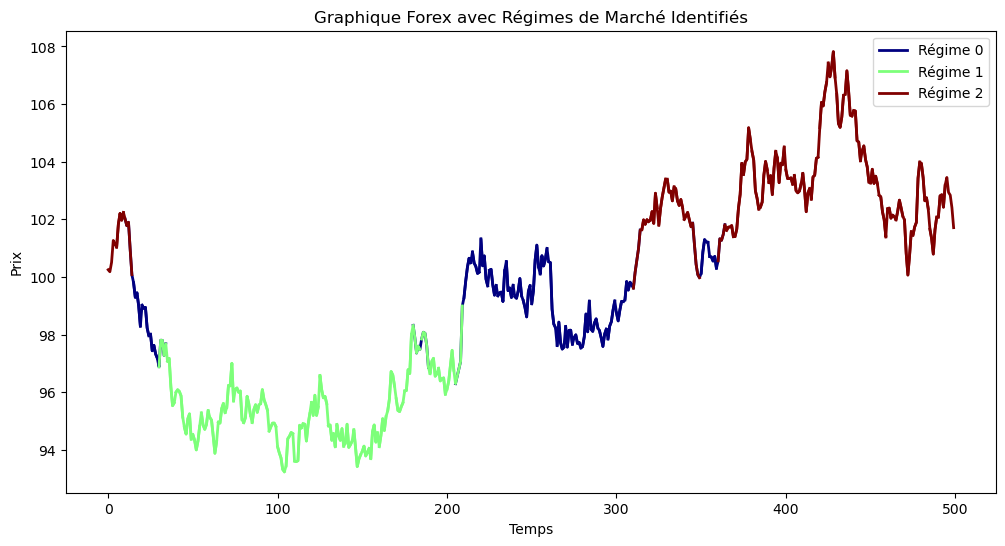

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

def sliding_window(data, window_size, step_size):
    return np.array([data[i:i + window_size] for i in range(0, len(data) - window_size + 1, step_size)])

def project_data(data, directions):
    projected = []
    for theta in directions:
        proj = np.dot(data, theta)
        projected.append(proj)
    return np.array(projected).T

def sliced_wasserstein_distance(X, Y, n_projections=10):
    directions = np.random.randn(n_projections, X.shape[1])
    directions /= np.linalg.norm(directions, axis=1)[:, np.newaxis]
    
    X_proj = project_data(X, directions)
    Y_proj = project_data(Y, directions)
    
    distances = []
    for i in range(n_projections):
        X_sorted = np.sort(X_proj[:, i])
        Y_sorted = np.sort(Y_proj[:, i])
        distances.append(np.mean(np.abs(X_sorted - Y_sorted)))
    return np.mean(distances)

def sWk_means_clustering(data, n_clusters=2, window_size=10, step_size=5, n_projections=10, tol=1e-6, max_iter=100):
    windows = sliding_window(data, window_size, step_size)
    windows_flat = windows.reshape(windows.shape[0], -1)
    
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=max_iter, tol=tol)
    
    distances = pairwise_distances(windows_flat, metric=lambda X, Y: sliced_wasserstein_distance(X.reshape(-1, 1), Y.reshape(-1, 1), n_projections))
    
    clusters = kmeans.fit_predict(distances)
    
    return clusters, kmeans.cluster_centers_

# Générer des données de prix simulées (Forex)
np.random.seed(42)
time_steps = 500
prices = np.cumsum(np.random.randn(time_steps) * 0.5) + 100  # Série temporelle de prix

# Paramètres pour sWk-means
n_clusters = 3  # Nombre de régimes de marché
window_size = 10  # Taille de la fenêtre glissante
step_size = 5  # Décalage de la fenêtre glissante
n_projections = 20  # Nombre de projections

# Appliquer l'algorithme sWk-means
clusters, centroids = sWk_means_clustering(prices.reshape(-1, 1), n_clusters, window_size, step_size, n_projections)

# Tracer le graphique des prix avec les régimes identifiés
plt.figure(figsize=(12, 6))
unique_clusters = np.unique(clusters)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_clusters)))

for idx, cluster in enumerate(unique_clusters):
    indices = np.where(clusters == cluster)[0]
    # Étendre chaque point du cluster aux positions de la fenêtre glissante
    for i in indices:
        start = i * step_size
        end = start + window_size
        plt.plot(range(start, end), prices[start:end], color=colors[idx], label=f"Régime {cluster}" if i == indices[0] else "", linewidth=2)

plt.xlabel("Temps")
plt.ylabel("Prix")
plt.title("Graphique Forex avec Régimes de Marché Identifiés")
plt.legend()
plt.show()


C:\Users\chane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


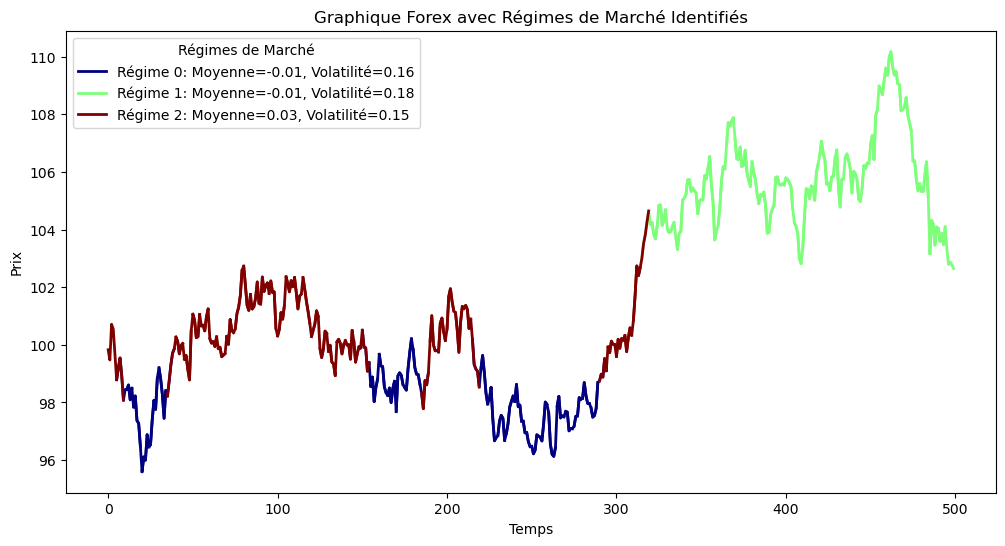

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

def sliding_window(data, window_size, step_size):
    return np.array([data[i:i + window_size] for i in range(0, len(data) - window_size + 1, step_size)])

def project_data(data, directions):
    projected = []
    for theta in directions:
        proj = np.dot(data, theta)
        projected.append(proj)
    return np.array(projected).T

def sliced_wasserstein_distance(X, Y, n_projections=10):
    directions = np.random.randn(n_projections, X.shape[1])
    directions /= np.linalg.norm(directions, axis=1)[:, np.newaxis]
    
    X_proj = project_data(X, directions)
    Y_proj = project_data(Y, directions)
    
    distances = []
    for i in range(n_projections):
        X_sorted = np.sort(X_proj[:, i])
        Y_sorted = np.sort(Y_proj[:, i])
        distances.append(np.mean(np.abs(X_sorted - Y_sorted)))
    return np.mean(distances)

def sWk_means_clustering(data, n_clusters=2, window_size=10, step_size=5, n_projections=10, tol=1e-6, max_iter=100):
    windows = sliding_window(data, window_size, step_size)
    windows_flat = windows.reshape(windows.shape[0], -1)
    
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=max_iter, tol=tol)
    distances = pairwise_distances(windows_flat, metric=lambda X, Y: sliced_wasserstein_distance(X.reshape(-1, 1), Y.reshape(-1, 1), n_projections))
    clusters = kmeans.fit_predict(distances)
    
    return clusters, kmeans.cluster_centers_

# Générer des données de prix simulées (Forex)
#np.random.seed(40)
time_steps = 500
prices = np.cumsum(np.random.randn(time_steps) * 0.5) + 100  # Série temporelle de prix

# Paramètres pour sWk-means
n_clusters = 3  # Nombre de régimes de marché
window_size = 10  # Taille de la fenêtre glissante
step_size = 5  # Décalage de la fenêtre glissante
n_projections = 20  # Nombre de projections

# Appliquer l'algorithme sWk-means
clusters, centroids = sWk_means_clustering(prices.reshape(-1, 1), n_clusters, window_size, step_size, n_projections)

# Calculer les variations de prix pour les fenêtres glissantes utilisées dans clusters
windows = sliding_window(prices, window_size, step_size)
returns = np.mean(np.diff(windows, axis=1), axis=1)  # Moyennes des variations dans chaque fenêtre

# Créer un DataFrame pour les régimes et calculer les statistiques
regime_data = pd.DataFrame({
    "Return": returns,
    "Regime": clusters
})

# Calcul des caractéristiques de chaque régime
regime_stats = regime_data.groupby("Regime").agg(
    mean_return=("Return", "mean"),
    volatility=("Return", "std")
).reset_index()

# Tracer le graphique des prix avec les régimes identifiés
plt.figure(figsize=(12, 6))
unique_clusters = np.unique(clusters)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_clusters)))

for idx, cluster in enumerate(unique_clusters):
    indices = np.where(clusters == cluster)[0]
    # Obtenir la moyenne et la volatilité de chaque régime pour la légende
    mean_return = regime_stats.loc[regime_stats["Regime"] == cluster, "mean_return"].values[0]
    volatility = regime_stats.loc[regime_stats["Regime"] == cluster, "volatility"].values[0]
    label = f"Régime {cluster}: Moyenne={mean_return:.2f}, Volatilité={volatility:.2f}"
    
    # Tracer chaque segment de régime avec une couleur unique
    for i in indices:
        start = i * step_size
        end = start + window_size
        plt.plot(range(start, end), prices[start:end], color=colors[idx], label=label if i == indices[0] else "", linewidth=2)

# Légendes et axes
plt.xlabel("Temps")
plt.ylabel("Prix")
plt.title("Graphique Forex avec Régimes de Marché Identifiés")
plt.legend(title="Régimes de Marché")
plt.show()

Essayons d'identifier la nature de chaque régime en définissant nous meme des prix haussiers, volatiles et baissiers

C:\Users\chane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


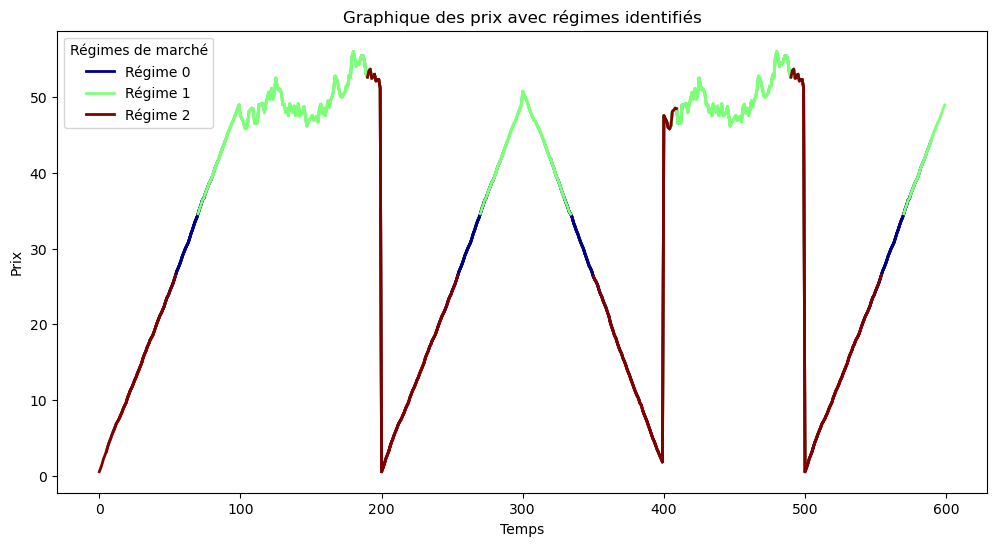

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# Générer des données simulées
np.random.seed(42)

# Régime haussier : tendance à la hausse
uptrend = np.cumsum(np.random.normal(0.5, 0.1, 100))

# Régime volatil : forte fluctuation autour d'un niveau moyen
volatile = np.cumsum(np.random.normal(0, 1, 100)) + uptrend[-1]

# Régime baissier : tendance à la baisse
downtrend = np.cumsum(np.random.normal(-0.5, 0.1, 100)) + volatile[-1]

# Concatenation des données pour avoir la série temporelle finale
prices = np.concatenate([uptrend, volatile, uptrend ,downtrend, volatile, uptrend])

# Paramètres pour le clustering
window_size = 25
step_size = 5
n_clusters = 3
n_projections = 20

# Fonction de découpage en fenêtres glissantes
def sliding_window(data, window_size, step_size):
    return np.array([data[i:i + window_size] for i in range(0, len(data) - window_size + 1, step_size)])

# Fonction de projection aléatoire pour Wasserstein distance "sliced"
def project_data(data, directions):
    projected = []
    for theta in directions:
        proj = np.dot(data, theta)
        projected.append(proj)
    return np.array(projected).T

# Fonction de calcul de la distance Wasserstein "sliced"
def sliced_wasserstein_distance(X, Y, n_projections=10):
    directions = np.random.randn(n_projections, X.shape[1])
    directions /= np.linalg.norm(directions, axis=1)[:, np.newaxis]
    X_proj = project_data(X, directions)
    Y_proj = project_data(Y, directions)
    distances = []
    for i in range(n_projections):
        X_sorted = np.sort(X_proj[:, i])
        Y_sorted = np.sort(Y_proj[:, i])
        distances.append(np.mean(np.abs(X_sorted - Y_sorted)))
    return np.mean(distances)

# Clustering Wasserstein K-means
def sWk_means_clustering(data, n_clusters=3, window_size=10, step_size=5, n_projections=10, tol=1e-6, max_iter=1000):
    windows = sliding_window(data, window_size, step_size)
    windows_flat = windows.reshape(windows.shape[0], -1)
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=max_iter, tol=tol)
    distances = pairwise_distances(windows_flat, metric=lambda X, Y: sliced_wasserstein_distance(X.reshape(-1, 1), Y.reshape(-1, 1), n_projections))
    clusters = kmeans.fit_predict(distances)
    return clusters, kmeans.cluster_centers_

# Appliquer le clustering pour identifier les régimes
clusters, _ = sWk_means_clustering(prices.reshape(-1, 1), n_clusters=n_clusters, window_size=window_size, step_size=step_size, n_projections=n_projections)

# Tracer le graphique des prix avec les régimes identifiés
plt.figure(figsize=(12, 6))
unique_clusters = np.unique(clusters)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_clusters)))

for idx, cluster in enumerate(unique_clusters):
    indices = np.where(clusters == cluster)[0]
    for i in indices:
        start = i * step_size
        end = start + window_size
        plt.plot(range(start, end), prices[start:end], color=colors[idx], label=f"Régime {cluster}" if i == indices[0] else "", linewidth=2)

# Détails du graphique
plt.xlabel("Temps")
plt.ylabel("Prix")
plt.title("Graphique des prix avec régimes identifiés")
plt.legend(title="Régimes de marché")
plt.show()
#[uptrend, volatile, uptrend ,downtrend, volatile, uptrend]

Essayons la meme chose mais avec le graphe d'une action pour voir si on arrive à les identifier

[*********************100%***********************]  1 of 1 completed
C:\Users\chane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


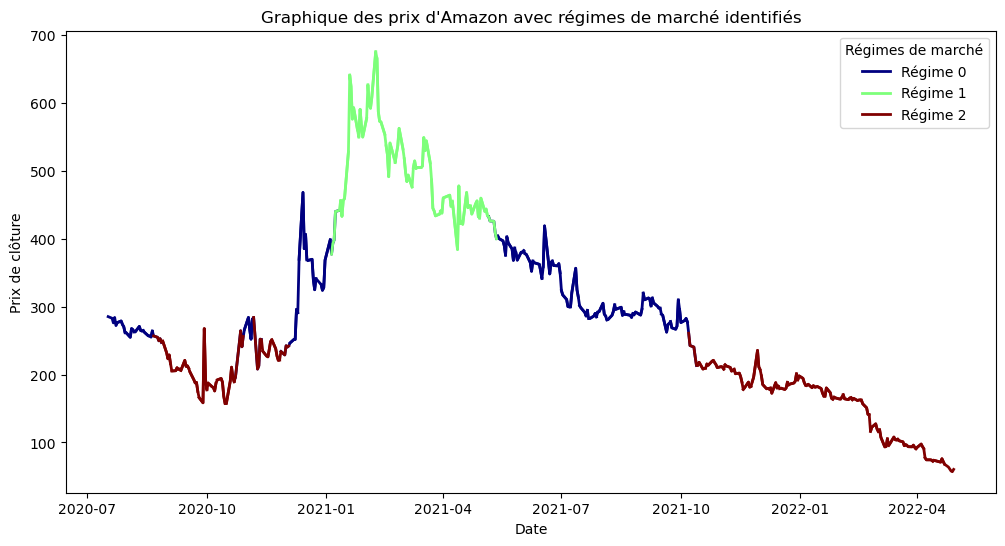

In [73]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# Charger les données de prix à partir de Yahoo Finance pour Amazon (AMZN)
def load_data(ticker, start, end):
    data = yf.download(ticker, start=start, end=end, interval="1d")
    data = data['Close'].dropna()  # Utiliser les prix de clôture
    return data

# Fonction de découpage en fenêtres glissantes
def sliding_window(data, window_size, step_size):
    return np.array([data[i:i + window_size] for i in range(0, len(data) - window_size + 1, step_size)])

# Fonction de projection aléatoire pour Wasserstein distance "sliced"
def project_data(data, directions):
    projected = []
    for theta in directions:
        proj = np.dot(data, theta)
        projected.append(proj)
    return np.array(projected).T

# Fonction de calcul de la distance Wasserstein "sliced"
def sliced_wasserstein_distance(X, Y, n_projections=10):
    directions = np.random.randn(n_projections, X.shape[1])
    directions /= np.linalg.norm(directions, axis=1)[:, np.newaxis]
    X_proj = project_data(X, directions)
    Y_proj = project_data(Y, directions)
    distances = []
    for i in range(n_projections):
        X_sorted = np.sort(X_proj[:, i])
        Y_sorted = np.sort(Y_proj[:, i])
        distances.append(np.mean(np.abs(X_sorted - Y_sorted)))
    return np.mean(distances)

# Clustering Wasserstein K-means
def sWk_means_clustering(data, n_clusters=3, window_size=10, step_size=5, n_projections=10, tol=1e-6, max_iter=100):
    windows = sliding_window(data, window_size, step_size)
    windows_flat = windows.reshape(windows.shape[0], -1)
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=max_iter, tol=tol)
    distances = pairwise_distances(windows_flat, metric=lambda X, Y: sliced_wasserstein_distance(X.reshape(-1, 1), Y.reshape(-1, 1), n_projections))
    clusters = kmeans.fit_predict(distances)
    return clusters, kmeans.cluster_centers_

# Paramètres pour le clustering
window_size = 10
step_size = 5
n_clusters = 3
n_projections = 20

# Charger les données Amazon
ticker = "ALBPS.PA"
start_date = "2020-07-17"
end_date = "2022-05-06"
prices = load_data(ticker, start_date, end_date)

# Appliquer le clustering pour identifier les régimes sur les prix de clôture
clusters, _ = sWk_means_clustering(prices.values.reshape(-1, 1), n_clusters=n_clusters, window_size=window_size, step_size=step_size, n_projections=n_projections)

# Tracer le graphique des prix avec les régimes identifiés
plt.figure(figsize=(12, 6))
unique_clusters = np.unique(clusters)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_clusters)))

for idx, cluster in enumerate(unique_clusters):
    indices = np.where(clusters == cluster)[0]
    for i in indices:
        start = i * step_size
        end = start + window_size
        plt.plot(prices.index[start:end], prices.values[start:end], color=colors[idx], label=f"Régime {cluster}" if i == indices[0] else "", linewidth=2)

# Détails du graphique
plt.xlabel("Date")
plt.ylabel("Prix de clôture")
plt.title("Graphique des prix d'Amazon avec régimes de marché identifiés")
plt.legend(title="Régimes de marché")
plt.show()


Testons une nouvelle fois d'optimiser les parametres de window et step sur le forex

[*********************100%***********************]  1 of 1 completed
C:\Users\chane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\chane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\chane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\chane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.

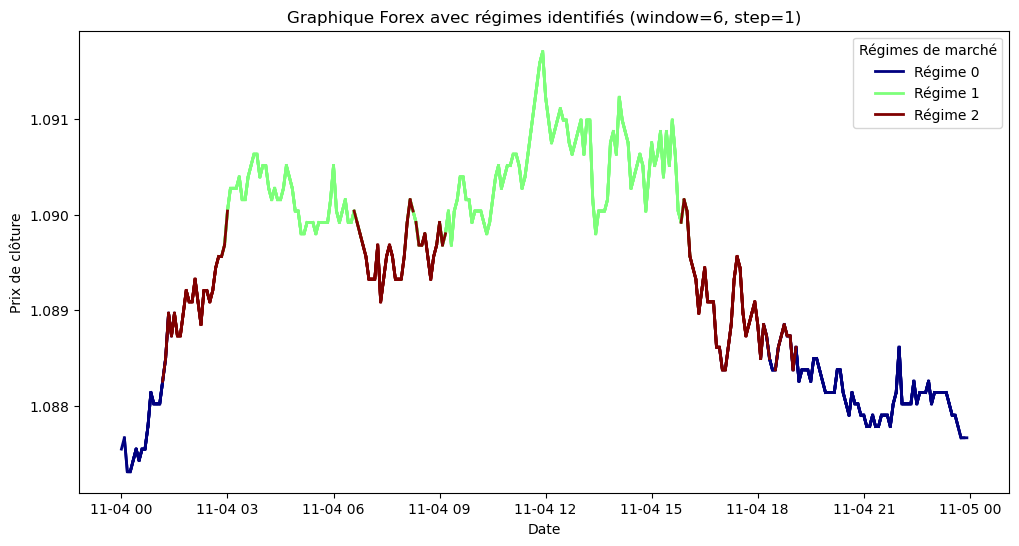

Meilleur window_size: 6, Meilleur step_size: 1


In [102]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# Charger les données de Forex ou tout autre actif
def load_data(ticker, start, end, interval="1m"):
    data = yf.download(ticker, start=start, end=end, interval=interval)
    data = data['Close'].dropna()  # Utiliser les prix de clôture
    return data

# Fonction de découpage en fenêtres glissantes
def sliding_window(data, window_size, step_size):
    return np.array([data[i:i + window_size] for i in range(0, len(data) - window_size + 1, step_size)])

# Fonction de projection aléatoire pour Wasserstein distance "sliced"
def project_data(data, directions):
    projected = []
    for theta in directions:
        proj = np.dot(data, theta)
        projected.append(proj)
    return np.array(projected).T

# Fonction de calcul de la distance Wasserstein "sliced"
def sliced_wasserstein_distance(X, Y, n_projections=10):
    directions = np.random.randn(n_projections, X.shape[1])
    directions /= np.linalg.norm(directions, axis=1)[:, np.newaxis]
    X_proj = project_data(X, directions)
    Y_proj = project_data(Y, directions)
    distances = []
    for i in range(n_projections):
        X_sorted = np.sort(X_proj[:, i])
        Y_sorted = np.sort(Y_proj[:, i])
        distances.append(np.mean(np.abs(X_sorted - Y_sorted)))
    return np.mean(distances)

# Clustering Wasserstein K-means
def sWk_means_clustering(data, n_clusters=3, window_size=10, step_size=5, n_projections=10, tol=1e-6, max_iter=100):
    windows = sliding_window(data, window_size, step_size)
    windows_flat = windows.reshape(windows.shape[0], -1)
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=max_iter, tol=tol)
    distances = pairwise_distances(windows_flat, metric=lambda X, Y: sliced_wasserstein_distance(X.reshape(-1, 1), Y.reshape(-1, 1), n_projections))
    clusters = kmeans.fit_predict(distances)
    return clusters, kmeans.cluster_centers_

# Optimisation des paramètres
def optimize_parameters(prices, possible_window_sizes, possible_step_sizes, n_clusters=3, n_projections=10):
    log_returns_data = log_returns(prices)
    best_score = float('inf')
    best_params = (None, None)
    for window_size in possible_window_sizes:
        for step_size in possible_step_sizes:
            try:
                
                clusters, _ = sWk_means_clustering(log_returns_data.values.reshape(-1, 1), n_clusters=n_clusters, window_size=window_size, step_size=step_size, n_projections=n_projections)
                # Calcul d'un score basé sur la dispersion intraclasse
                score = KMeans(n_clusters=n_clusters).fit(prices.values.reshape(-1, 1)).inertia_
                if score < best_score:
                    best_score = score
                    best_params = (window_size, step_size)
            except Exception as e:
                print(f"Erreur avec window_size={window_size}, step_size={step_size}: {e}")
                continue
    return best_params

# Paramètres à tester pour le Forex avec un intervalle de 1 minute
ticker = "EURUSD=X"
start_date = "2024-11-04"
end_date = "2024-11-05"
interval = "5m"  # Intervalle de 1 minute pour le Forex

# Charger les données
prices = load_data(ticker, start_date, end_date, interval=interval)

# Définir les valeurs possibles pour window_size et step_size
possible_window_sizes = range(5, 16)  # Essayer différentes tailles de fenêtre
possible_step_sizes = range(1, 6)  # Essayer différents décalages

# Optimiser les paramètres
best_window_size, best_step_size = optimize_parameters(prices, possible_window_sizes, possible_step_sizes)

# Appliquer le clustering avec les meilleurs paramètres
clusters, _ = sWk_means_clustering(prices.values.reshape(-1, 1), n_clusters=3, window_size=best_window_size, step_size=best_step_size, n_projections=n_projections)

# Tracer le graphique des prix avec les régimes identifiés
plt.figure(figsize=(12, 6))
unique_clusters = np.unique(clusters)
colors = plt.cm.jet(np.linspace(0, 1, len(unique_clusters)))

for idx, cluster in enumerate(unique_clusters):
    indices = np.where(clusters == cluster)[0]
    for i in indices:
        start = i * best_step_size
        end = start + best_window_size
        plt.plot(prices.index[start:end], prices.values[start:end], color=colors[idx], label=f"Régime {cluster}" if i == indices[0] else "", linewidth=2)

# Détails du graphique
plt.xlabel("Date")
plt.ylabel("Prix de clôture")
plt.title(f"Graphique Forex avec régimes identifiés (window={best_window_size}, step={best_step_size})")
plt.legend(title="Régimes de marché")
plt.show()

print(f"Meilleur window_size: {best_window_size}, Meilleur step_size: {best_step_size}")


In [75]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

# Charger les données de prix à partir de Yahoo Finance
def load_data(ticker, start, end):
    data = yf.download(ticker, start=start, end=end, interval="5m")
    data = data['Close'].dropna()  # Utiliser les prix de clôture
    return data

# Appliquer sWk-means clustering pour identifier les régimes de marché
def sliding_window(data, window_size, step_size):
    return np.array([data[i:i + window_size] for i in range(0, len(data) - window_size + 1, step_size)])

def project_data(data, directions):
    projected = []
    for theta in directions:
        proj = np.dot(data, theta)
        projected.append(proj)
    return np.array(projected).T

def sliced_wasserstein_distance(X, Y, n_projections=10):
    directions = np.random.randn(n_projections, X.shape[1])
    directions /= np.linalg.norm(directions, axis=1)[:, np.newaxis]
    X_proj = project_data(X, directions)
    Y_proj = project_data(Y, directions)
    distances = []
    for i in range(n_projections):
        X_sorted = np.sort(X_proj[:, i])
        Y_sorted = np.sort(Y_proj[:, i])
        distances.append(np.mean(np.abs(X_sorted - Y_sorted)))
    return np.mean(distances)

def sWk_means_clustering(data, n_clusters=3, window_size=10, step_size=5, n_projections=10, tol=1e-6, max_iter=100):
    windows = sliding_window(data, window_size, step_size)
    windows_flat = windows.reshape(windows.shape[0], -1)
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=max_iter, tol=tol)
    distances = pairwise_distances(windows_flat, metric=lambda X, Y: sliced_wasserstein_distance(X.reshape(-1, 1), Y.reshape(-1, 1), n_projections))
    clusters = kmeans.fit_predict(distances)
    return clusters, kmeans.cluster_centers_

# Backtester une stratégie de scalping
def backtest_strategy(prices, clusters, step_size, window_size):
    positions = []  # Historique des positions
    pnl = []  # Profit et perte (PnL) par transaction

    for i in range(1, len(prices) - 1):
        # Vérifier le régime actuel
        cluster = clusters[i // step_size] if i // step_size < len(clusters) else clusters[-1]
        
        # Logique de scalping en fonction du régime
        if cluster == 0:  # Régime baissier
            if prices[i] < prices[i-1]:  # Détecter un point bas pour une position courte
                positions.append(-1)  # Position courte
                pnl.append(prices[i-1] - prices[i])  # Profit si le prix baisse

        elif cluster == 1:  # Régime de consolidation
            if prices[i] > prices[i-1] and prices[i] < prices[i+1]:  # Acheter bas et vendre haut
                positions.append(1)  # Position longue
                pnl.append(prices[i+1] - prices[i])  # Profit si le prix monte

        elif cluster == 2:  # Régime haussier
            if prices[i] > prices[i-1]:  # Détecter un point bas pour une position longue
                positions.append(1)  # Position longue
                pnl.append(prices[i+1] - prices[i])  # Profit si le prix monte

    # Calcul des performances
    total_profit = np.sum(pnl)
    win_rate = np.mean([1 if x > 0 else 0 for x in pnl])
    avg_profit_per_trade = np.mean(pnl)
    
    return total_profit, win_rate, avg_profit_per_trade

# Exécuter le backtest sur un ticker spécifique
ticker = "AAPL"
start_date = "2024-10-01"
end_date = "2024-11-05"

# Charger les données
prices = load_data(ticker, start_date, end_date)

# Appliquer le clustering pour identifier les régimes
window_size = 10
step_size = 5
clusters, _ = sWk_means_clustering(prices.values.reshape(-1, 1), n_clusters=3, window_size=window_size, step_size=step_size)

# Backtester la stratégie
total_profit, win_rate, avg_profit_per_trade = backtest_strategy(prices.values, clusters, step_size, window_size)

print(f"Résultats du backtest pour {ticker}:")
print(f"Profit total: {total_profit}")
print(f"Taux de succès: {win_rate * 100:.2f}%")
print(f"Profit moyen par trade: {avg_profit_per_trade:.2f}")


[*********************100%***********************]  1 of 1 completed


Résultats du backtest pour AAPL:
Profit total: 94.39103698730469
Taux de succès: 79.53%
Profit moyen par trade: 0.12


C:\Users\chane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [83]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

# Charger les données de prix à partir de Yahoo Finance
def load_data(ticker, start, end):
    data = yf.download(ticker, start=start, end=end, interval="5m")
    data = data['Close'].dropna()  # Utiliser les prix de clôture
    return data

# Appliquer sWk-means clustering pour identifier les régimes de marché
def sliding_window(data, window_size, step_size):
    return np.array([data[i:i + window_size] for i in range(0, len(data) - window_size + 1, step_size)])

def project_data(data, directions):
    projected = []
    for theta in directions:
        proj = np.dot(data, theta)
        projected.append(proj)
    return np.array(projected).T

def sliced_wasserstein_distance(X, Y, n_projections=10):
    directions = np.random.randn(n_projections, X.shape[1])
    directions /= np.linalg.norm(directions, axis=1)[:, np.newaxis]
    X_proj = project_data(X, directions)
    Y_proj = project_data(Y, directions)
    distances = []
    for i in range(n_projections):
        X_sorted = np.sort(X_proj[:, i])
        Y_sorted = np.sort(Y_proj[:, i])
        distances.append(np.mean(np.abs(X_sorted - Y_sorted)))
    return np.mean(distances)

def sWk_means_clustering(data, n_clusters=3, window_size=10, step_size=5, n_projections=10, tol=1e-6, max_iter=100):
    windows = sliding_window(data, window_size, step_size)
    windows_flat = windows.reshape(windows.shape[0], -1)
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=max_iter, tol=tol)
    distances = pairwise_distances(windows_flat, metric=lambda X, Y: sliced_wasserstein_distance(X.reshape(-1, 1), Y.reshape(-1, 1), n_projections))
    clusters = kmeans.fit_predict(distances)
    return clusters, kmeans.cluster_centers_

# Backtester une stratégie de scalping avec gestion du capital
def backtest_strategy(prices, clusters, step_size, window_size, capital_initial):
    capital = capital_initial  # Capital de départ
    positions = []  # Historique des positions
    pnl = []  # Profit et perte (PnL) par transaction

    for i in range(1, len(prices) - 1):
        # Vérifier le régime actuel
        cluster = clusters[i // step_size] if i // step_size < len(clusters) else clusters[-1]
        
        # Logique de scalping en fonction du régime
        if cluster == 0:  # Régime baissier
            if prices[i] < prices[i-1]:  # Détecter un point bas pour une position courte
                positions.append(-1)  # Position courte
                profit = prices[i-1] - prices[i]  # Profit si le prix baisse
                capital += profit  # Ajuster le capital
                pnl.append(profit)

        elif cluster == 1:  # Régime de consolidation
            if prices[i] > prices[i-1] and prices[i] < prices[i+1]:  # Acheter bas et vendre haut
                positions.append(1)  # Position longue
                profit = prices[i+1] - prices[i]  # Profit si le prix monte
                capital += profit  # Ajuster le capital
                pnl.append(profit)

        elif cluster == 2:  # Régime haussier
            if prices[i] > prices[i-1]:  # Détecter un point bas pour une position longue
                positions.append(1)  # Position longue
                profit = prices[i+1] - prices[i]  # Profit si le prix monte
                capital += profit  # Ajuster le capital
                pnl.append(profit)

    # Calcul des performances
    total_profit = np.sum(pnl)
    win_rate = np.mean([1 if x > 0 else 0 for x in pnl])
    avg_profit_per_trade = np.mean(pnl)
    capital_final = capital  # Capital à la fin du backtest
    
    return total_profit, win_rate, avg_profit_per_trade, capital_initial, capital_final

# Exécuter le backtest sur un ticker spécifique
ticker = "AMZN"
start_date = "2024-10-01"
end_date = "2024-11-05"
capital_initial = 10000  # Capital initial investi

# Charger les données
prices = load_data(ticker, start_date, end_date)

# Appliquer le clustering pour identifier les régimes
window_size = 10
step_size = 5
clusters, _ = sWk_means_clustering(prices.values.reshape(-1, 1), n_clusters=3, window_size=window_size, step_size=step_size)

# Backtester la stratégie avec gestion du capital
total_profit, win_rate, avg_profit_per_trade, capital_initial, capital_final = backtest_strategy(prices.values, clusters, step_size, window_size, capital_initial)

print(f"Résultats du backtest pour {ticker}:")
print(f"Capital initial: {capital_initial}")
print(f"Capital final: {capital_final}")
print(f"Profit total: {total_profit}")
print(f"Taux de succès: {win_rate * 100:.2f}%")
print(f"Profit moyen par trade: {avg_profit_per_trade:.2f}")


[*********************100%***********************]  1 of 1 completed


Résultats du backtest pour AMZN:
Capital initial: 10000
Capital final: [10112.5274353]
Profit total: 112.52743530273438
Taux de succès: 79.52%
Profit moyen par trade: 0.12


C:\Users\chane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

# Charger les données de prix à partir de Yahoo Finance
def load_data(ticker, start, end):
    data = yf.download(ticker, start=start, end=end, interval="5m")
    data = data['Close'].dropna()  # Utiliser les prix de clôture
    return data

# Appliquer sWk-means clustering pour identifier les régimes de marché
def sliding_window(data, window_size, step_size):
    return np.array([data[i:i + window_size] for i in range(0, len(data) - window_size + 1, step_size)])

def project_data(data, directions):
    projected = []
    for theta in directions:
        proj = np.dot(data, theta)
        projected.append(proj)
    return np.array(projected).T

def sliced_wasserstein_distance(X, Y, n_projections=10):
    directions = np.random.randn(n_projections, X.shape[1])
    directions /= np.linalg.norm(directions, axis=1)[:, np.newaxis]
    X_proj = project_data(X, directions)
    Y_proj = project_data(Y, directions)
    distances = []
    for i in range(n_projections):
        X_sorted = np.sort(X_proj[:, i])
        Y_sorted = np.sort(Y_proj[:, i])
        distances.append(np.mean(np.abs(X_sorted - Y_sorted)))
    return np.mean(distances)

def sWk_means_clustering(data, n_clusters=3, window_size=10, step_size=5, n_projections=10, tol=1e-6, max_iter=100):
    windows = sliding_window(data, window_size, step_size)
    windows_flat = windows.reshape(windows.shape[0], -1)
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=max_iter, tol=tol)
    distances = pairwise_distances(windows_flat, metric=lambda X, Y: sliced_wasserstein_distance(X.reshape(-1, 1), Y.reshape(-1, 1), n_projections))
    clusters = kmeans.fit_predict(distances)
    return clusters, kmeans.cluster_centers_

# Backtester une stratégie de scalping avec gestion du capital et enregistrement des positions
def backtest_strategy(prices, clusters, step_size, window_size, capital_initial):
    capital = capital_initial  # Capital de départ
    trades = []  # Liste pour enregistrer les transactions

    for i in range(1, len(prices) - 1):
        # Vérifier le régime actuel
        cluster = clusters[i // step_size] if i // step_size < len(clusters) else clusters[-1]
        
        # Logique de scalping en fonction du régime
        if cluster == 0:  # Régime baissier
            if prices[i] < prices[i-1]:  # Détecter un point bas pour une position courte
                profit = prices[i-1] - prices[i]  # Profit si le prix baisse
                capital += profit  # Ajuster le capital
                trades.append({
                    "Type": "Vente",
                    "Prix d'entrée": prices[i-1],
                    "Prix de sortie": prices[i],
                    "Profit": profit
                })

        elif cluster == 1:  # Régime de consolidation
            if prices[i] > prices[i-1] and prices[i] < prices[i+1]:  # Acheter bas et vendre haut
                profit = prices[i+1] - prices[i]  # Profit si le prix monte
                capital += profit  # Ajuster le capital
                trades.append({
                    "Type": "Achat",
                    "Prix d'entrée": prices[i],
                    "Prix de sortie": prices[i+1],
                    "Profit": profit
                })

        elif cluster == 2:  # Régime haussier
            if prices[i] > prices[i-1]:  # Détecter un point bas pour une position longue
                profit = prices[i+1] - prices[i]  # Profit si le prix monte
                capital += profit  # Ajuster le capital
                trades.append({
                    "Type": "Achat",
                    "Prix d'entrée": prices[i],
                    "Prix de sortie": prices[i+1],
                    "Profit": profit
                })

    # Calcul des performances
    total_profit = np.sum([trade['Profit'] for trade in trades])  # Assurez-vous que total_profit est un nombre
    win_rate = np.mean([1 if trade['Profit'] > 0 else 0 for trade in trades])
    avg_profit_per_trade = total_profit / len(trades) if len(trades) > 0 else 0.0  # Forcer le résultat à être un float
    capital_final = capital  # Capital à la fin du backtest

    
    return total_profit, win_rate, avg_profit_per_trade, capital_initial, capital_final, trades

# Exécuter le backtest sur un ticker spécifique
ticker = "DAL"
start_date = "2024-10-01"
end_date = "2024-11-05"
capital_initial = 10000  # Capital initial investi

# Charger les données
prices = load_data(ticker, start_date, end_date)

# Appliquer le clustering pour identifier les régimes
window_size = 10
step_size = 5
clusters, _ = sWk_means_clustering(prices.values.reshape(-1, 1), n_clusters=3, window_size=window_size, step_size=step_size)

# Backtester la stratégie avec gestion du capital
total_profit, win_rate, avg_profit_per_trade, capital_initial, capital_final, trades = backtest_strategy(prices.values, clusters, step_size, window_size, capital_initial)



print(f"Résultats du backtest pour {ticker}:")
print(f"Capital initial: {capital_initial}")
print(f"Capital final: {capital_final}")
print(f"Profit total: {total_profit}")
print(f"Taux de succès: {win_rate * 100:.2f}%")
print(f"Profit moyen par trade: {avg_profit_per_trade:.2f}\n")

# Afficher les informations détaillées des positions
print("Détails des positions :")
for trade in trades:
    print(f"{trade['Type']} - Entrée: {float(trade["Prix d'entrée"])}, Sortie: {float(trade['Prix de sortie'])}, Profit: {float(trade['Profit']):.2f}")


[*********************100%***********************]  1 of 1 completed


Résultats du backtest pour DAL:
Capital initial: 10000
Capital final: [10041.12952042]
Profit total: 41.129520416259766
Taux de succès: 79.41%
Profit moyen par trade: 0.05

Détails des positions :
Achat - Entrée: 49.47999954223633, Sortie: 49.34000015258789, Profit: -0.14
Achat - Entrée: 49.36840057373047, Sortie: 49.5, Profit: 0.13
Achat - Entrée: 49.5, Sortie: 49.630001068115234, Profit: 0.13
Achat - Entrée: 49.630001068115234, Sortie: 49.66999816894531, Profit: 0.04
Achat - Entrée: 49.66999816894531, Sortie: 49.59000015258789, Profit: -0.08
Achat - Entrée: 49.69729995727539, Sortie: 49.62139892578125, Profit: -0.08
Achat - Entrée: 49.755001068115234, Sortie: 49.75, Profit: -0.01
Achat - Entrée: 49.541099548339844, Sortie: 49.7599983215332, Profit: 0.22
Achat - Entrée: 49.7599983215332, Sortie: 49.869998931884766, Profit: 0.11
Achat - Entrée: 49.869998931884766, Sortie: 50.08000183105469, Profit: 0.21
Achat - Entrée: 50.08000183105469, Sortie: 50.20000076293945, Profit: 0.12
Achat - 

C:\Users\chane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\chane\AppData\Local\Temp\ipykernel_7268\333957941.py:126: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"{trade['Type']} - Entrée: {float(trade["Prix d'entrée"])}, Sortie: {float(trade['Prix de sortie'])}, Profit: {float(trade['Profit']):.2f}")


Appliquons le WKM sur les log rendements

In [100]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

# Charger les données de prix à partir de Yahoo Finance
def load_data(ticker, start, end):
    data = yf.download(ticker, start=start, end=end, interval="5m")
    data = data['Close'].dropna()  # Utiliser les prix de clôture
    return data

# Calculer les rendements logarithmiques
def log_returns(data):
    return np.log(data / data.shift(1)).dropna()

# Appliquer sWk-means clustering pour identifier les régimes de marché
def sliding_window(data, window_size, step_size):
    return np.array([data[i:i + window_size] for i in range(0, len(data) - window_size + 1, step_size)])

def project_data(data, directions):
    projected = []
    for theta in directions:
        proj = np.dot(data, theta)
        projected.append(proj)
    return np.array(projected).T

def sliced_wasserstein_distance(X, Y, n_projections=10):
    directions = np.random.randn(n_projections, X.shape[1])
    directions /= np.linalg.norm(directions, axis=1)[:, np.newaxis]
    X_proj = project_data(X, directions)
    Y_proj = project_data(Y, directions)
    distances = []
    for i in range(n_projections):
        X_sorted = np.sort(X_proj[:, i])
        Y_sorted = np.sort(Y_proj[:, i])
        distances.append(np.mean(np.abs(X_sorted - Y_sorted)))
    return np.mean(distances)

def sWk_means_clustering(data, n_clusters=3, window_size=10, step_size=5, n_projections=10, tol=1e-6, max_iter=100):
    windows = sliding_window(data, window_size, step_size)
    windows_flat = windows.reshape(windows.shape[0], -1)
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=max_iter, tol=tol)
    distances = pairwise_distances(windows_flat, metric=lambda X, Y: sliced_wasserstein_distance(X.reshape(-1, 1), Y.reshape(-1, 1), n_projections))
    clusters = kmeans.fit_predict(distances)
    return clusters, kmeans.cluster_centers_

# Backtester une stratégie de scalping avec gestion du capital et enregistrement des positions
def backtest_strategy(prices, clusters, step_size, window_size, capital_initial):
    capital = capital_initial  # Capital de départ
    trades = []  # Liste pour enregistrer les transactions

    for i in range(1, len(prices) - 1):
        # Vérifier le régime actuel
        cluster = clusters[i // step_size] if i // step_size < len(clusters) else clusters[-1]
        
        # Logique de scalping en fonction du régime
        if cluster == 0:  # Régime baissier
            if prices[i] < prices[i-1]:  # Détecter un point bas pour une position courte
                profit = prices[i-1] - prices[i]  # Profit si le prix baisse
                capital += profit  # Ajuster le capital
                trades.append({
                    "Type": "Vente",
                    "Prix d'entrée": prices[i-1],
                    "Prix de sortie": prices[i],
                    "Profit": profit
                })

        elif cluster == 1:  # Régime de consolidation
            if prices[i] > prices[i-1] and prices[i] < prices[i+1]:  # Acheter bas et vendre haut
                profit = prices[i+1] - prices[i]  # Profit si le prix monte
                capital += profit  # Ajuster le capital
                trades.append({
                    "Type": "Achat",
                    "Prix d'entrée": prices[i],
                    "Prix de sortie": prices[i+1],
                    "Profit": profit
                })

        elif cluster == 2:  # Régime haussier
            if prices[i] > prices[i-1]:  # Détecter un point bas pour une position longue
                profit = prices[i+1] - prices[i]  # Profit si le prix monte
                capital += profit  # Ajuster le capital
                trades.append({
                    "Type": "Achat",
                    "Prix d'entrée": prices[i],
                    "Prix de sortie": prices[i+1],
                    "Profit": profit
                })

    # Calcul des performances
    total_profit = np.sum([trade['Profit'] for trade in trades])  # Assurez-vous que total_profit est un nombre
    win_rate = np.mean([1 if trade['Profit'] > 0 else 0 for trade in trades])
    avg_profit_per_trade = total_profit / len(trades) if len(trades) > 0 else 0.0  # Forcer le résultat à être un float
    capital_final = capital  # Capital à la fin du backtest
    
    return total_profit, win_rate, avg_profit_per_trade, capital_initial, capital_final, trades

# Exécuter le backtest sur un ticker spécifique
ticker = "DAL"
start_date = "2024-10-01"
end_date = "2024-11-05"
capital_initial = 10000  # Capital initial investi

# Charger les données
prices = load_data(ticker, start_date, end_date)

# Calculer les rendements logarithmiques
log_returns_data = log_returns(prices)

# Appliquer le clustering pour identifier les régimes sur les log-rendements
window_size = 10
step_size = 5
clusters, _ = sWk_means_clustering(log_returns_data.values.reshape(-1, 1), n_clusters=3, window_size=window_size, step_size=step_size)

# Backtester la stratégie avec gestion du capital
total_profit, win_rate, avg_profit_per_trade, capital_initial, capital_final, trades = backtest_strategy(prices.values, clusters, step_size, window_size, capital_initial)

print(f"Résultats du backtest pour {ticker}:")
print(f"Capital initial: {capital_initial}")
print(f"Capital final: {capital_final}")
print(f"Profit total: {total_profit}")
print(f"Taux de succès: {win_rate * 100:.2f}%")
print(f"Profit moyen par trade: {avg_profit_per_trade:.2f}\n")

# Afficher les informations détaillées des positions
print("Détails des positions :")
#for trade in trades:
#    print(f"{trade['Type']} - Entrée: {float(trade["Prix d'entrée"])}, Sortie: {float(trade['Prix de sortie'])}, Profit: {float(trade['Profit']):.2f}")



[*********************100%***********************]  1 of 1 completed


Résultats du backtest pour DAL:
Capital initial: 10000
Capital final: [10060.19609451]
Profit total: 60.19609451293945
Taux de succès: 97.16%
Profit moyen par trade: 0.07

Détails des positions :


C:\Users\chane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


On essaye d'ajuster les positions selon le capital de dispo dans le portefeuille

In [104]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

# Charger les données de prix à partir de Yahoo Finance
def load_data(ticker, start, end):
    data = yf.download(ticker, start=start, end=end, interval="5m")
    data = data['Close'].dropna()  # Utiliser les prix de clôture
    return data

# Calculer les rendements logarithmiques
def log_returns(data):
    return np.log(data / data.shift(1)).dropna()

# Appliquer sWk-means clustering pour identifier les régimes de marché
def sliding_window(data, window_size, step_size):
    return np.array([data[i:i + window_size] for i in range(0, len(data) - window_size + 1, step_size)])

def project_data(data, directions):
    projected = []
    for theta in directions:
        proj = np.dot(data, theta)
        projected.append(proj)
    return np.array(projected).T

def sliced_wasserstein_distance(X, Y, n_projections=10):
    directions = np.random.randn(n_projections, X.shape[1])
    directions /= np.linalg.norm(directions, axis=1)[:, np.newaxis]
    X_proj = project_data(X, directions)
    Y_proj = project_data(Y, directions)
    distances = []
    for i in range(n_projections):
        X_sorted = np.sort(X_proj[:, i])
        Y_sorted = np.sort(Y_proj[:, i])
        distances.append(np.mean(np.abs(X_sorted - Y_sorted)))
    return np.mean(distances)

def sWk_means_clustering(data, n_clusters=3, window_size=10, step_size=5, n_projections=10, tol=1e-6, max_iter=100):
    windows = sliding_window(data, window_size, step_size)
    windows_flat = windows.reshape(windows.shape[0], -1)
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=max_iter, tol=tol)
    distances = pairwise_distances(windows_flat, metric=lambda X, Y: sliced_wasserstein_distance(X.reshape(-1, 1), Y.reshape(-1, 1), n_projections))
    clusters = kmeans.fit_predict(distances)
    return clusters, kmeans.cluster_centers_

# Backtester une stratégie de scalping avec gestion du capital et de la taille des positions
def backtest_strategy(prices, clusters, step_size, window_size, capital_initial, lot_size=1, risk_fraction=0.01):
    capital = capital_initial  # Capital de départ
    trades = []  # Liste pour enregistrer les transactions

    for i in range(1, len(prices) - 1):
        # Vérifier le régime actuel
        cluster = clusters[i // step_size] if i // step_size < len(clusters) else clusters[-1]

        # Calcul de la taille de la position basée sur le capital et la fraction de risque
        # Taille de la position dépend de la fraction du capital que l'on souhaite risquer
        max_risk = capital * risk_fraction  # Montant maximal à risquer
        units = max_risk / (lot_size * prices[i])  # Calcul de la taille de la position en nombre d'unités

        if units == 0:  # Si les unités calculées sont inférieures à 1, éviter le trade
            continue
        
        # Logique de scalping en fonction du régime
        if cluster == 0:  # Régime baissier
            if prices[i] < prices[i-1]:  # Détecter un point bas pour une position courte
                profit = (prices[i-1] - prices[i]) * units  # Profit ajusté par la taille de la position
                capital += profit  # Ajuster le capital
                trades.append({
                    "Type": "Vente",
                    "Prix d'entrée": prices[i-1],
                    "Prix de sortie": prices[i],
                    "Profit": profit,
                    "Units": units
                })

        elif cluster == 1:  # Régime de consolidation
            if prices[i] > prices[i-1] and prices[i] < prices[i+1]:  # Acheter bas et vendre haut
                profit = (prices[i+1] - prices[i]) * units  # Profit ajusté par la taille de la position
                capital += profit  # Ajuster le capital
                trades.append({
                    "Type": "Achat",
                    "Prix d'entrée": prices[i],
                    "Prix de sortie": prices[i+1],
                    "Profit": profit,
                    "Units": units
                })

        elif cluster == 2:  # Régime haussier
            if prices[i] > prices[i-1]:  # Détecter un point bas pour une position longue
                profit = (prices[i+1] - prices[i]) * units  # Profit ajusté par la taille de la position
                capital += profit  # Ajuster le capital
                trades.append({
                    "Type": "Achat",
                    "Prix d'entrée": prices[i],
                    "Prix de sortie": prices[i+1],
                    "Profit": profit,
                    "Units": units
                })

    # Calcul des performances
    total_profit = np.sum([trade['Profit'] for trade in trades])  # Assurez-vous que total_profit est un nombre
    win_rate = np.mean([1 if trade['Profit'] > 0 else 0 for trade in trades])
    avg_profit_per_trade = total_profit / len(trades) if len(trades) > 0 else 0.0  # Forcer le résultat à être un float
    capital_final = capital  # Capital à la fin du backtest
    
    return total_profit, win_rate, avg_profit_per_trade, capital_initial, capital_final, trades


# Charger les données de Forex ou tout autre actif
def load_data_forex(ticker, start, end, interval="1m"):
    data = yf.download(ticker, start=start, end=end, interval=interval)
    data = data['Close'].dropna()  # Utiliser les prix de clôture
    return data
# Paramètres à tester pour le Forex avec un intervalle de 1 minute
ticker = "EURUSD=X"
start_date = "2024-11-05"
end_date = "2024-11-06"
interval = "5m"  # Intervalle de 1 minute pour le Forex
"""
# Exécuter le backtest sur un ticker spécifique
ticker = "EURUSD=X"
start_date = "2024-10-01"
end_date = "2024-11-05"
"""
capital_initial = 10000  # Capital initial investi

# Charger les données
prices = load_data_forex(ticker, start_date, end_date, interval="1m")

# Calculer les rendements logarithmiques
log_returns_data = log_returns(prices)

# Appliquer le clustering pour identifier les régimes sur les log-rendements
window_size = 6
step_size = 1
clusters, _ = sWk_means_clustering(log_returns_data.values.reshape(-1, 1), n_clusters=3, window_size=window_size, step_size=step_size)

# Backtester la stratégie avec gestion du capital et taille de la position dynamique
total_profit, win_rate, avg_profit_per_trade, capital_initial, capital_final, trades = backtest_strategy(
    prices.values, clusters, step_size, window_size, capital_initial, lot_size=1, risk_fraction=0.1
)

print(f"Résultats du backtest pour {ticker}:")
print(f"Capital initial: {capital_initial}")
print(f"Capital final: {capital_final}")
print(f"Profit total: {total_profit}")
print(f"Taux de succès: {win_rate * 100:.2f}%")
print(f"Profit moyen par trade: {avg_profit_per_trade:.2f}\n")

# Afficher les informations détaillées des positions
#print("Détails des positions :")
#for trade in trades:
#    print(f"{trade['Type']} - Entrée: {float(trade["Prix d'entrée"])}, Sortie: {float(trade['Prix de sortie'])}, Profit: {float(trade['Profit']):.2f}")



[*********************100%***********************]  1 of 1 completed


KeyboardInterrupt: 

Décalage aléatoire

[*********************100%***********************]  1 of 1 completed
C:\Users\chane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


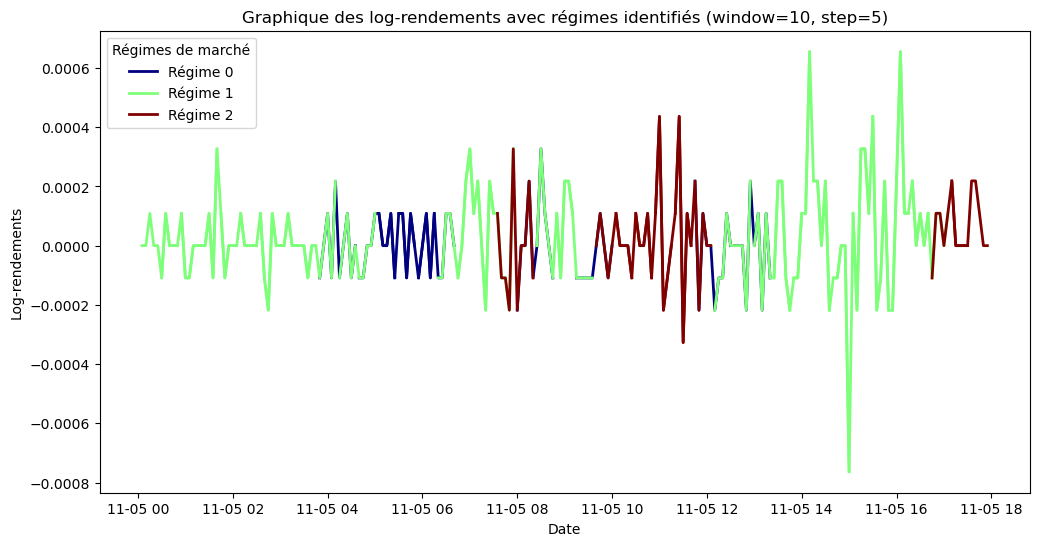

Meilleur window_size: 10, Meilleur step_size: 5


In [108]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# Charger les données de Forex ou tout autre actif
def load_data(ticker, start, end, interval="1m"):
    data = yf.download(ticker, start=start, end=end, interval=interval)
    data = data['Close'].dropna()  # Utiliser les prix de clôture
    return data

# Calculer les rendements logarithmiques
def log_returns(data):
    return np.log(data / data.shift(1)).dropna()

# Fonction de découpage en fenêtres glissantes avec décalage aléatoire
def sliding_window(data, window_size, step_size):
    windows = []
    i = 0
    while i + window_size <= len(data):
        # Appliquer un décalage aléatoire entre 0 et step_size - 1
        random_offset = np.random.randint(0, step_size)
        windows.append(data[i:i + window_size])
        i += step_size + random_offset
    return np.array(windows) if windows else np.array([])

# Fonction de projection aléatoire pour Wasserstein distance "sliced"
def project_data(data, directions):
    projected = []
    for theta in directions:
        proj = np.dot(data, theta)
        projected.append(proj)
    return np.array(projected).T

# Fonction de calcul de la distance Wasserstein "sliced"
def sliced_wasserstein_distance(X, Y, n_projections=10):
    directions = np.random.randn(n_projections, X.shape[1])
    directions /= np.linalg.norm(directions, axis=1)[:, np.newaxis]
    X_proj = project_data(X, directions)
    Y_proj = project_data(Y, directions)
    distances = []
    for i in range(n_projections):
        X_sorted = np.sort(X_proj[:, i])
        Y_sorted = np.sort(Y_proj[:, i])
        distances.append(np.mean(np.abs(X_sorted - Y_sorted)))
    return np.mean(distances)

# Clustering Wasserstein K-means
def sWk_means_clustering(data, n_clusters=3, window_size=10, step_size=5, n_projections=10, tol=1e-6, max_iter=100):
    windows = sliding_window(data, window_size, step_size)
    
    # Vérification si aucune fenêtre n'est générée
    if windows.size == 0:
        raise ValueError("Aucune fenêtre n'a été générée avec les paramètres actuels de window_size et step_size.")
    
    windows_flat = windows.reshape(windows.shape[0], -1)
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=max_iter, tol=tol)
    distances = pairwise_distances(windows_flat, metric=lambda X, Y: sliced_wasserstein_distance(X.reshape(-1, 1), Y.reshape(-1, 1), n_projections))
    clusters = kmeans.fit_predict(distances)
    return clusters, kmeans.cluster_centers_

# Paramètres pour le clustering
ticker = "EURUSD=X"
start_date = "2024-11-05"
end_date = "2024-11-06"
interval = "5m"  # Intervalle de 1 minute pour le Forex

# Charger les données
prices = load_data(ticker, start_date, end_date, interval=interval)

# Calculer les rendements logarithmiques
log_returns_data = log_returns(prices)

# Paramètres pour le clustering
window_size = 10
step_size = 5
n_clusters = 3
n_projections = 20

# Appliquer le clustering avec les rendements logarithmiques et décalage aléatoire
try:
    clusters, _ = sWk_means_clustering(log_returns_data.values.reshape(-1, 1), n_clusters=n_clusters, window_size=window_size, step_size=step_size, n_projections=n_projections)

    # Tracer le graphique des rendements logarithmiques avec les régimes identifiés
    plt.figure(figsize=(12, 6))
    unique_clusters = np.unique(clusters)
    colors = plt.cm.jet(np.linspace(0, 1, len(unique_clusters)))

    for idx, cluster in enumerate(unique_clusters):
        indices = np.where(clusters == cluster)[0]
        for i in indices:
            start = i * step_size
            end = start + window_size
            plt.plot(log_returns_data.index[start:end], log_returns_data.values[start:end], color=colors[idx], label=f"Régime {cluster}" if i == indices[0] else "", linewidth=2)

    # Détails du graphique
    plt.xlabel("Date")
    plt.ylabel("Log-rendements")
    plt.title(f"Graphique des log-rendements avec régimes identifiés (window={window_size}, step={step_size})")
    plt.legend(title="Régimes de marché")
    plt.show()

    #print(f"Meilleur window_size: {window_size}, Meilleur step_size: {step_size}")

except ValueError as e:
    print(f"Erreur : {e}")


Meme code que la cellule d'avant mais avec le backtesting en plus

In [129]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# Charger les données de Forex ou tout autre actif
def load_data(ticker, start, end, interval="1m"):
    data = yf.download(ticker, start=start, end=end, interval=interval)
    data = data['Close'].dropna()  # Utiliser les prix de clôture
    return data

# Calculer les rendements logarithmiques
def log_returns(data):
    return np.log(data / data.shift(1)).dropna()

# Fonction de découpage en fenêtres glissantes avec décalage aléatoire
def sliding_window(data, window_size, step_size):
    windows = []
    i = 0
    while i + window_size <= len(data):
        # Appliquer un décalage aléatoire entre 0 et step_size - 1
        random_offset = np.random.randint(0, step_size)
        windows.append(data[i:i + window_size])
        i += step_size + random_offset
    return np.array(windows) if windows else np.array([])

# Fonction de projection aléatoire pour Wasserstein distance "sliced"
def project_data(data, directions):
    projected = []
    for theta in directions:
        proj = np.dot(data, theta)
        projected.append(proj)
    return np.array(projected).T

# Fonction de calcul de la distance Wasserstein "sliced"
def sliced_wasserstein_distance(X, Y, n_projections=10):
    directions = np.random.randn(n_projections, X.shape[1])
    directions /= np.linalg.norm(directions, axis=1)[:, np.newaxis]
    X_proj = project_data(X, directions)
    Y_proj = project_data(Y, directions)
    distances = []
    for i in range(n_projections):
        X_sorted = np.sort(X_proj[:, i])
        Y_sorted = np.sort(Y_proj[:, i])
        distances.append(np.mean(np.abs(X_sorted - Y_sorted)))
    return np.mean(distances)

# Clustering Wasserstein K-means
def sWk_means_clustering(data, n_clusters=3, window_size=10, step_size=5, n_projections=10, tol=1e-6, max_iter=100):
    windows = sliding_window(data, window_size, step_size)
    
    # Vérification si aucune fenêtre n'est générée
    if windows.size == 0:
        raise ValueError("Aucune fenêtre n'a été générée avec les paramètres actuels de window_size et step_size.")
    
    windows_flat = windows.reshape(windows.shape[0], -1)
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=max_iter, tol=tol)
    distances = pairwise_distances(windows_flat, metric=lambda X, Y: sliced_wasserstein_distance(X.reshape(-1, 1), Y.reshape(-1, 1), n_projections))
    clusters = kmeans.fit_predict(distances)
    return clusters, kmeans.cluster_centers_

# Backtester une stratégie avec gestion du capital et de la taille des positions basée sur les régimes
def backtest_strategy(prices, clusters, step_size, window_size, capital_initial, lot_size=1, risk_fraction=0.01):
    capital = capital_initial  # Capital de départ
    trades = []  # Liste pour enregistrer les transactions

    for i in range(1, len(prices) - 1):
        # Vérifier le régime actuel
        cluster = clusters[i // step_size] if i // step_size < len(clusters) else clusters[-1]

        # Calcul de la taille de la position basée sur le capital et la fraction de risque
        max_risk = capital * risk_fraction  # Montant maximal à risquer
        units = max_risk / (lot_size * prices[i])  # Calcul de la taille de la position en nombre d'unités

        if units == 0:  # Si les unités calculées sont inférieures à 1, éviter le trade
            continue
        
        # Logique de scalping en fonction du régime
        if cluster == 0:  # Régime baissier
            if prices[i] < prices[i-1]:  # Détecter un point bas pour une position courte
                profit = (prices[i-1] - prices[i]) * units  # Profit ajusté par la taille de la position
                capital += profit  # Ajuster le capital
                trades.append({
                    "Type": "Vente",
                    "Prix d'entrée": prices[i-1],
                    "Prix de sortie": prices[i],
                    "Profit": profit,
                    "Units": units
                })

        elif cluster == 1:  # Régime de consolidation (volatil)
            if prices[i] > prices[i-1] and prices[i] < prices[i+1]:  # Acheter bas et vendre haut
                profit = (prices[i+1] - prices[i]) * units  # Profit ajusté par la taille de la position
                capital += profit  # Ajuster le capital
                trades.append({
                    "Type": "Achat",
                    "Prix d'entrée": prices[i],
                    "Prix de sortie": prices[i+1],
                    "Profit": profit,
                    "Units": units
                })

        elif cluster == 2:  # Régime haussier
            if prices[i] > prices[i-1]:  # Détecter un point bas pour une position longue
                profit = (prices[i+1] - prices[i]) * units  # Profit ajusté par la taille de la position
                capital += profit  # Ajuster le capital
                trades.append({
                    "Type": "Achat",
                    "Prix d'entrée": prices[i],
                    "Prix de sortie": prices[i+1],
                    "Profit": profit,
                    "Units": units
                })

    # Calcul des performances
    total_profit = np.sum([trade['Profit'] for trade in trades])  # Assurez-vous que total_profit est un nombre
    win_rate = np.mean([1 if trade['Profit'] > 0 else 0 for trade in trades])
    avg_profit_per_trade = total_profit / len(trades) if len(trades) > 0 else 0.0  # Forcer le résultat à être un float
    capital_final = capital  # Capital à la fin du backtest
    
    return total_profit, win_rate, avg_profit_per_trade, capital_initial, capital_final, trades


# Paramètres pour le clustering
ticker = "EURUSD=X"
start_date = "2024-11-03"
end_date = "2024-11-06"
interval = "5m"

# Charger les données
prices = load_data(ticker, start_date, end_date, interval=interval)

# Calculer les rendements logarithmiques
log_returns_data = log_returns(prices)

# Paramètres pour le clustering
window_size = 10
step_size = 5
n_clusters = 3
n_projections = 20

# Appliquer le clustering avec les rendements logarithmiques et décalage aléatoire
clusters, _ = sWk_means_clustering(log_returns_data.values.reshape(-1, 1), n_clusters=n_clusters, window_size=window_size, step_size=step_size, n_projections=n_projections)

# Backtester la stratégie avec gestion du capital et taille de la position dynamique
total_profit, win_rate, avg_profit_per_trade, capital_initial, capital_final, trades = backtest_strategy(
    prices.values, clusters, step_size, window_size, capital_initial, lot_size=1, risk_fraction=0.09
)

print(f"Résultats du backtest pour {ticker}:")
print(f"Capital initial: {capital_initial}")
print(f"Capital final: {capital_final}")
print(f"Profit total: {total_profit}")
print(f"Taux de succès: {win_rate * 100:.2f}%")
print(f"Profit moyen par trade: {avg_profit_per_trade:.2f}\n")

# Afficher les informations détaillées des positions
print("Détails des positions :")
for trade in trades:
    print(f"{trade['Type']} - Entrée: {float(trade["Prix d'entrée"])}, Sortie: {float(trade['Prix de sortie'])}, Profit: {float(trade['Profit']):.2f}, Units: {float(trade['Units']):.2f}")


[*********************100%***********************]  1 of 1 completed


Résultats du backtest pour EURUSD=X:
Capital initial: 10000
Capital final: [10017.87730523]
Profit total: 17.877305224994224
Taux de succès: 75.88%
Profit moyen par trade: 0.11

Détails des positions :
Vente - Entrée: 1.0876659154891968, Sortie: 1.087311029434204, Profit: 0.29, Units: 827.73
Vente - Entrée: 1.0875475406646729, Sortie: 1.0874292850494385, Profit: 0.10, Units: 827.66
Vente - Entrée: 1.088139295578003, Sortie: 1.088020920753479, Profit: 0.10, Units: 827.22
Vente - Entrée: 1.0889687538146973, Sortie: 1.0887316465377808, Profit: 0.20, Units: 826.69
Vente - Entrée: 1.0889687538146973, Sortie: 1.0887316465377808, Profit: 0.20, Units: 826.71
Vente - Entrée: 1.0892059803009033, Sortie: 1.0890873670578003, Profit: 0.10, Units: 826.45
Achat - Entrée: 1.0893245935440063, Sortie: 1.0890873670578003, Profit: -0.20, Units: 826.28
Achat - Entrée: 1.0892059803009033, Sortie: 1.0892059803009033, Profit: 0.00, Units: 826.35
Achat - Entrée: 1.0892059803009033, Sortie: 1.0894432067871094, 

C:\Users\chane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\chane\AppData\Local\Temp\ipykernel_11644\2400075400.py:162: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"{trade['Type']} - Entrée: {float(trade["Prix d'entrée"])}, Sortie: {float(trade['Prix de sortie'])}, Profit: {float(trade['Profit']):.2f}, Units: {float(trade['Units']):.2f}")


In [149]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# Charger les données de Forex ou tout autre actif
def load_data(ticker, start, end, interval="1m"):
    data = yf.download(ticker, start=start, end=end, interval=interval)
    data = data['Close'].dropna()  # Utiliser les prix de clôture
    return data

# Calculer les rendements logarithmiques
def log_returns(data):
    return np.log(data / data.shift(1)).dropna()

# Fonction de découpage en fenêtres glissantes avec décalage aléatoire
def sliding_window(data, window_size, step_size):
    windows = []
    i = 0
    while i + window_size <= len(data):
        random_offset = np.random.randint(0, step_size)
        windows.append(data[i:i + window_size])
        i += step_size + random_offset
    return np.array(windows) if windows else np.array([])

# Fonction de projection aléatoire pour Wasserstein distance "sliced"
def project_data(data, directions):
    projected = []
    for theta in directions:
        proj = np.dot(data, theta)
        projected.append(proj)
    return np.array(projected).T

# Fonction de calcul de la distance Wasserstein "sliced"
def sliced_wasserstein_distance(X, Y, n_projections=10):
    directions = np.random.randn(n_projections, X.shape[1])
    directions /= np.linalg.norm(directions, axis=1)[:, np.newaxis]
    X_proj = project_data(X, directions)
    Y_proj = project_data(Y, directions)
    distances = []
    for i in range(n_projections):
        X_sorted = np.sort(X_proj[:, i])
        Y_sorted = np.sort(Y_proj[:, i])
        distances.append(np.mean(np.abs(X_sorted - Y_sorted)))
    return np.mean(distances)

# Clustering Wasserstein K-means
def sWk_means_clustering(data, n_clusters=3, window_size=10, step_size=5, n_projections=10, tol=1e-6, max_iter=100):
    windows = sliding_window(data, window_size, step_size)
    
    if windows.size == 0:
        raise ValueError("Aucune fenêtre n'a été générée avec les paramètres actuels de window_size et step_size.")
    
    windows_flat = windows.reshape(windows.shape[0], -1)
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=max_iter, tol=tol)
    distances = pairwise_distances(windows_flat, metric=lambda X, Y: sliced_wasserstein_distance(X.reshape(-1, 1), Y.reshape(-1, 1), n_projections))
    clusters = kmeans.fit_predict(distances)
    return clusters, kmeans.cluster_centers_

# Backtester une stratégie avec gestion du capital et de la taille des positions basée sur les lots (ICI RISK FRACTION N'EST PAS PRIS EN COMPTE)
def backtest_strategy(prices, clusters, step_size, window_size, capital_initial, lot_size=0.1, risk_fraction=0.01):
    capital = capital_initial
    trades = []

    # Définition de la taille des unités selon MT4
    units_per_lot = 100_000  # Chaque lot standard correspond à 100,000 unités

    for i in range(1, len(prices) - 1):
        cluster = clusters[i // step_size] if i // step_size < len(clusters) else clusters[-1]

        # Calcul du nombre d'unités à trader en fonction du lot_size
        units = lot_size * units_per_lot

        # Vérification de la position pour chaque régime
        if cluster == 0:  # Régime baissier
            if prices[i] < prices[i - 1]:  # Position vente
                profit = (prices[i - 1] - prices[i]) * units / prices[i]
                capital += profit
                trades.append({
                    "Type": "Vente",
                    "Prix d'entrée": prices[i - 1],
                    "Prix de sortie": prices[i],
                    "Profit": profit,
                    "Units": units
                })

        elif cluster == 1:  # Régime volatil (consolidation)
            if prices[i] > prices[i - 1] and prices[i] < prices[i + 1]:  # Achat et vente dans les fluctuations
                profit = (prices[i + 1] - prices[i]) * units / prices[i]
                capital += profit
                trades.append({
                    "Type": "Achat",
                    "Prix d'entrée": prices[i],
                    "Prix de sortie": prices[i + 1],
                    "Profit": profit,
                    "Units": units
                })

        elif cluster == 2:  # Régime haussier
            if prices[i] > prices[i - 1]:  # Position longue
                profit = (prices[i + 1] - prices[i]) * units / prices[i]
                capital += profit
                trades.append({
                    "Type": "Achat",
                    "Prix d'entrée": prices[i],
                    "Prix de sortie": prices[i + 1],
                    "Profit": profit,
                    "Units": units
                })

    # Résultats du backtest
    total_profit = np.sum([trade['Profit'] for trade in trades])
    win_rate = np.mean([1 if trade['Profit'] > 0 else 0 for trade in trades])
    avg_profit_per_trade = total_profit / len(trades) if len(trades) > 0 else 0.0
    capital_final = capital
    
    return total_profit, win_rate, avg_profit_per_trade, capital_initial, capital_final, trades

"""
# Backtester une stratégie avec gestion du capital et de la taille des positions basée sur les lots
def backtest_strategy(prices, clusters, step_size, window_size, capital_initial, lot_size=0.1, risk_fraction=0.01):
    capital = capital_initial
    trades = []

    # Définition de la taille des unités selon MT4
    units_per_lot = 100_000  # Chaque lot standard correspond à 100,000 unités

    for i in range(1, len(prices) - 1):
        cluster = clusters[i // step_size] if i // step_size < len(clusters) else clusters[-1]

        # Calcul du montant maximal à risquer pour ce trade
        max_risk = capital * risk_fraction

        # Calcul de la taille de la position en fonction de max_risk
        pip_value = 0.0001 * units_per_lot  # Valeur approximative par pip pour 1 lot
        units = min(lot_size * units_per_lot, max_risk / pip_value)  # Limiter la taille en fonction du risque

        # Vérification de la position pour chaque régime
        if cluster == 0:  # Régime baissier
            if prices[i] < prices[i - 1]:  # Position vente
                profit = (prices[i - 1] - prices[i]) * units / prices[i]
                capital += profit
                trades.append({
                    "Type": "Vente",
                    "Prix d'entrée": prices[i - 1],
                    "Prix de sortie": prices[i],
                    "Profit": profit,
                    "Units": units
                })

        elif cluster == 1:  # Régime volatil (consolidation)
            if prices[i] > prices[i - 1] and prices[i] < prices[i + 1]:  # Achat et vente dans les fluctuations
                profit = (prices[i + 1] - prices[i]) * units / prices[i]
                capital += profit
                trades.append({
                    "Type": "Achat",
                    "Prix d'entrée": prices[i],
                    "Prix de sortie": prices[i + 1],
                    "Profit": profit,
                    "Units": units
                })

        elif cluster == 2:  # Régime haussier
            if prices[i] > prices[i - 1]:  # Position longue
                profit = (prices[i + 1] - prices[i]) * units / prices[i]
                capital += profit
                trades.append({
                    "Type": "Achat",
                    "Prix d'entrée": prices[i],
                    "Prix de sortie": prices[i + 1],
                    "Profit": profit,
                    "Units": units
                })

    # Résultats du backtest
    total_profit = np.sum([trade['Profit'] for trade in trades])
    win_rate = np.mean([1 if trade['Profit'] > 0 else 0 for trade in trades])
    avg_profit_per_trade = total_profit / len(trades) if len(trades) > 0 else 0.0
    capital_final = capital
    
    return total_profit, win_rate, avg_profit_per_trade, capital_initial, capital_final, trades
"""

# Paramètres pour le clustering et le backtest
ticker = "EURUSD=X"
start_date = "2024-11-03"
end_date = "2024-11-06"
interval = "5m"
capital_initial = 10000
lot_size = 0.2  # Mini-lot

prices = load_data(ticker, start_date, end_date, interval=interval)
log_returns_data = log_returns(prices)
window_size = 10
step_size = 3
clusters, _ = sWk_means_clustering(log_returns_data.values.reshape(-1, 1), n_clusters=3, window_size=window_size, step_size=step_size)

# Backtester la stratégie
total_profit, win_rate, avg_profit_per_trade, capital_initial, capital_final, trades = backtest_strategy(
    prices.values, clusters, step_size, window_size, capital_initial, lot_size=lot_size, risk_fraction=0.3
)

print(f"Résultats du backtest pour {ticker}:")
print(f"Capital initial: {capital_initial}")
print(f"Capital final: {capital_final}")
print(f"Profit total: {total_profit}")
print(f"Taux de succès: {win_rate * 100:.2f}%")
print(f"Profit moyen par trade: {avg_profit_per_trade:.2f}\n")

# Afficher les informations détaillées des positions
print("Détails des positions :")
for trade in trades:
    print(f"{trade['Type']} - Entrée: {float(trade["Prix d'entrée"])}, Sortie: {float(trade['Prix de sortie'])}, Profit: {float(trade['Profit']):.2f}, Units: {float(trade['Units']):.2f}")


[*********************100%***********************]  1 of 1 completed


Résultats du backtest pour EURUSD=X:
Capital initial: 10000
Capital final: [10399.01095775]
Profit total: 399.0109577463743
Taux de succès: 81.46%
Profit moyen par trade: 2.64

Détails des positions :
Achat - Entrée: 1.0876659154891968, Sortie: 1.087311029434204, Profit: -6.53, Units: 20000.00
Achat - Entrée: 1.0874292850494385, Sortie: 1.0875475406646729, Profit: 2.17, Units: 20000.00
Achat - Entrée: 1.0875475406646729, Sortie: 1.0874292850494385, Profit: -2.17, Units: 20000.00
Achat - Entrée: 1.0875475406646729, Sortie: 1.0875475406646729, Profit: 0.00, Units: 20000.00
Achat - Entrée: 1.0877841711044312, Sortie: 1.088139295578003, Profit: 6.53, Units: 20000.00
Achat - Entrée: 1.088139295578003, Sortie: 1.088020920753479, Profit: -2.18, Units: 20000.00
Achat - Entrée: 1.0882576704025269, Sortie: 1.0884946584701538, Profit: 4.36, Units: 20000.00
Achat - Entrée: 1.0884946584701538, Sortie: 1.0889687538146973, Profit: 8.71, Units: 20000.00
Achat - Entrée: 1.0889687538146973, Sortie: 1.08

C:\Users\chane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\chane\AppData\Local\Temp\ipykernel_11644\1047434108.py:215: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"{trade['Type']} - Entrée: {float(trade["Prix d'entrée"])}, Sortie: {float(trade['Prix de sortie'])}, Profit: {float(trade['Profit']):.2f}, Units: {float(trade['Units']):.2f}")


CROISEMENT DU CODE AVEC LE WASSERSTEIN CLASSIQUE DE LOIC POUR VOIR SI CA MARCHE MIEUX

[*********************100%***********************]  1 of 1 completed
C:\Users\chane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


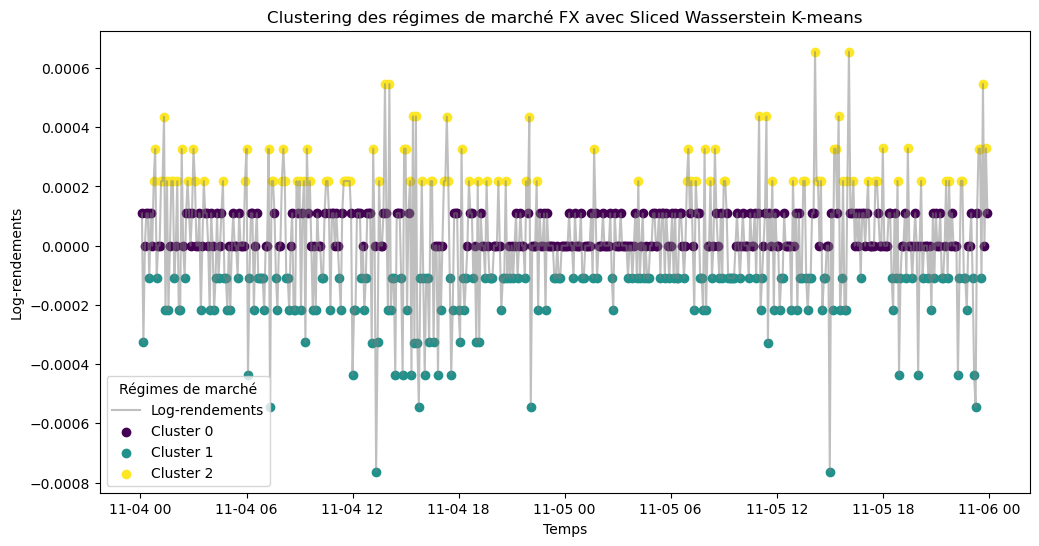

In [22]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance
import yfinance as yf

# Chargement des données de prix à partir de Yahoo Finance
def load_data(ticker, start, end, interval="1m"):
    data = yf.download(ticker, start=start, end=end, interval=interval)
    data = data['Close'].dropna()  # Utiliser les prix de clôture
    return data

# Calculer les rendements logarithmiques
def log_returns(data):
    return np.log(data / data.shift(1)).dropna()

# Fonction de projection aléatoire pour Wasserstein distance "sliced"
def project_data(data, directions):
    projected = []
    for theta in directions:
        proj = np.dot(data, theta)
        projected.append(proj)
    return np.array(projected).T

# Fonction de calcul de la distance Wasserstein "sliced"
def sliced_wasserstein_distance(X, Y, n_projections=10):
    directions = np.random.randn(n_projections, X.shape[1])
    directions /= np.linalg.norm(directions, axis=1)[:, np.newaxis]
    X_proj = project_data(X, directions)
    Y_proj = project_data(Y, directions)
    distances = []
    for i in range(n_projections):
        X_sorted = np.sort(X_proj[:, i])
        Y_sorted = np.sort(Y_proj[:, i])
        distances.append(np.mean(np.abs(X_sorted - Y_sorted)))
    return np.mean(distances)

# Implémentation de l'algorithme Sliced Wasserstein K-means
class SlicedWassersteinKMeans:
    def __init__(self, n_clusters, n_projections=10, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.n_projections = n_projections
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None

    def fit(self, data):
        # Initialisation des clusters avec KMeans classique pour obtenir les premiers centroids
        kmeans = KMeans(n_clusters=self.n_clusters)
        labels = kmeans.fit_predict(data)
        self.centroids = [np.mean(data[labels == k], axis=0) for k in range(self.n_clusters)]

        for iteration in range(self.max_iter):
            # Calcul des barycentres Wasserstein pour chaque cluster
            new_centroids = []
            for k in range(self.n_clusters):
                cluster_points = data[labels == k]
                if len(cluster_points) > 0:
                    centroid = np.mean(cluster_points, axis=0)
                    new_centroids.append(centroid)
                else:
                    new_centroids.append(self.centroids[k])  # Garde l'ancien centre si le cluster est vide

            new_centroids = np.array(new_centroids)

            # Vérification de la convergence
            shift = np.sum([sliced_wasserstein_distance(self.centroids[i].reshape(-1, 1), 
                                                        new_centroids[i].reshape(-1, 1), 
                                                        self.n_projections) 
                            for i in range(self.n_clusters)])
            if shift < self.tol:
                break
            self.centroids = new_centroids

            # Réassignation des labels en fonction des nouvelles distances Wasserstein
            labels = np.array([np.argmin([sliced_wasserstein_distance(data[i].reshape(-1, 1), 
                                                                      self.centroids[j].reshape(-1, 1), 
                                                                      self.n_projections) 
                                          for j in range(self.n_clusters)]) for i in range(len(data))])

        return labels

# Paramètres pour les données et le clustering
ticker = "EURUSD=X"
start_date = "2024-11-03"
end_date = "2024-11-06"
interval = "5m"

# Charger les données de prix et calculer les log-rendements
prices = load_data(ticker, start_date, end_date, interval=interval)
log_returns_data = log_returns(prices)

# Appliquer l'algorithme de Sliced Wasserstein K-means sur les log-rendements
sliced_wasserstein_kmeans = SlicedWassersteinKMeans(n_clusters=3, n_projections=20)
labels = sliced_wasserstein_kmeans.fit(log_returns_data.values.reshape(-1, 1))

# Visualisation des résultats
plt.figure(figsize=(12, 6))

# Tracer la courbe complète des log-rendements en arrière-plan
plt.plot(log_returns_data.index, log_returns_data.values, color='grey', alpha=0.5, label="Log-rendements")

# Superposer les points colorés pour chaque cluster
unique_labels = np.unique(labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

for idx, cluster in enumerate(unique_labels):
    cluster_indices = np.where(labels == cluster)[0]
    plt.scatter(log_returns_data.index[cluster_indices], log_returns_data.values[cluster_indices], 
                color=colors[idx], label=f"Cluster {cluster}")

# Détails du graphique
plt.xlabel("Temps")
plt.ylabel("Log-rendements")
plt.title("Clustering des régimes de marché FX avec Sliced Wasserstein K-means")
plt.legend(title="Régimes de marché")
plt.show()


[*********************100%***********************]  1 of 1 completed
C:\Users\chane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


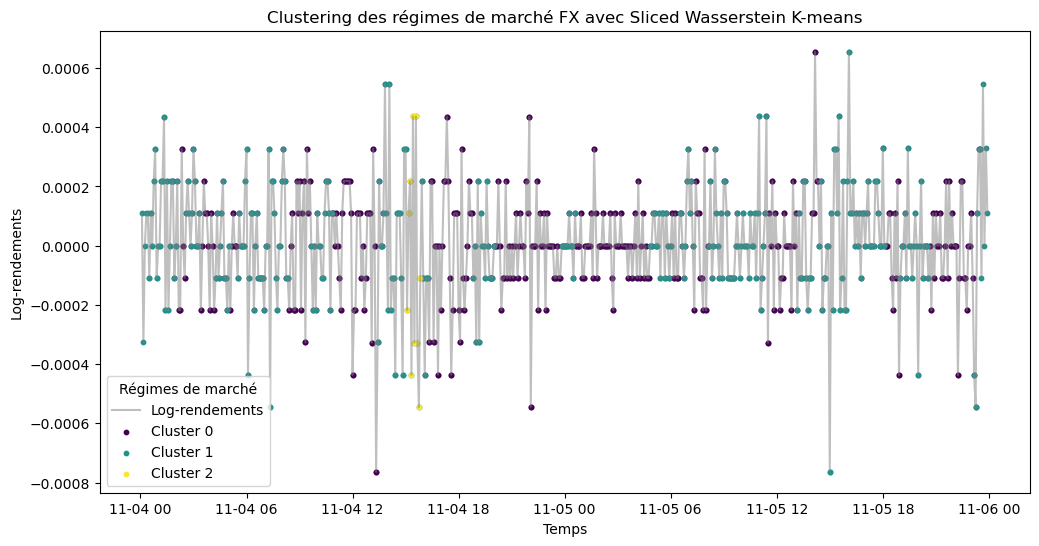

In [30]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance
import yfinance as yf

# Chargement des données de prix à partir de Yahoo Finance
def load_data(ticker, start, end, interval="1m"):
    data = yf.download(ticker, start=start, end=end, interval=interval)
    data = data['Close'].dropna()  # Utiliser les prix de clôture
    return data

# Calculer les rendements logarithmiques
def log_returns(data):
    return np.log(data / data.shift(1)).dropna()

# Fonction de découpage en fenêtres glissantes
def sliding_window(data, window_size, step_size):
    return np.array([data[i:i + window_size] for i in range(0, len(data) - window_size + 1, step_size)])

# Fonction de projection aléatoire pour Wasserstein distance "sliced"
def project_data(data, directions):
    projected = []
    for theta in directions:
        proj = np.dot(data, theta)
        projected.append(proj)
    return np.array(projected).T

# Fonction de calcul de la distance Wasserstein "sliced"
def sliced_wasserstein_distance(X, Y, n_projections=10):
    directions = np.random.randn(n_projections, X.shape[1])
    directions /= np.linalg.norm(directions, axis=1)[:, np.newaxis]
    X_proj = project_data(X, directions)
    Y_proj = project_data(Y, directions)
    distances = []
    for i in range(n_projections):
        X_sorted = np.sort(X_proj[:, i])
        Y_sorted = np.sort(Y_proj[:, i])
        distances.append(np.mean(np.abs(X_sorted - Y_sorted)))
    return np.mean(distances)

# Implémentation de l'algorithme Sliced Wasserstein K-means
class SlicedWassersteinKMeans:
    def __init__(self, n_clusters, n_projections=10, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.n_projections = n_projections
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None

    def fit(self, data):
        # Initialisation des clusters avec KMeans classique pour obtenir les premiers centroids
        kmeans = KMeans(n_clusters=self.n_clusters)
        labels = kmeans.fit_predict(data)
        self.centroids = [np.mean(data[labels == k], axis=0) for k in range(self.n_clusters)]

        for iteration in range(self.max_iter):
            # Calcul des barycentres Wasserstein pour chaque cluster
            new_centroids = []
            for k in range(self.n_clusters):
                cluster_points = data[labels == k]
                if len(cluster_points) > 0:
                    centroid = np.mean(cluster_points, axis=0)
                    new_centroids.append(centroid)
                else:
                    new_centroids.append(self.centroids[k])  # Garde l'ancien centre si le cluster est vide

            new_centroids = np.array(new_centroids)

            # Vérification de la convergence
            shift = np.sum([sliced_wasserstein_distance(self.centroids[i].reshape(-1, 1), 
                                                        new_centroids[i].reshape(-1, 1), 
                                                        self.n_projections) 
                            for i in range(self.n_clusters)])
            if shift < self.tol:
                break
            self.centroids = new_centroids

            # Réassignation des labels en fonction des nouvelles distances Wasserstein
            labels = np.array([np.argmin([sliced_wasserstein_distance(data[i].reshape(-1, 1), 
                                                                      self.centroids[j].reshape(-1, 1), 
                                                                      self.n_projections) 
                                          for j in range(self.n_clusters)]) for i in range(len(data))])

        return labels

# Paramètres pour les données et le clustering
ticker = "EURUSD=X"
start_date = "2024-11-03"
end_date = "2024-11-06"
interval = "5m"

# Charger les données de prix et calculer les log-rendements
prices = load_data(ticker, start_date, end_date, interval=interval)
log_returns_data = log_returns(prices)

# Paramètres supplémentaires pour le découpage en fenêtres
window_size = 10  # Taille de la fenêtre
step_size = 5  # Pas de la fenêtre

# Appliquer la fenêtre glissante sur les log-rendements
windowed_log_returns = sliding_window(log_returns_data.values, window_size, step_size)
windowed_log_returns = windowed_log_returns.reshape(windowed_log_returns.shape[0], -1)  # Aplatir chaque fenêtre

# Appliquer l'algorithme de Sliced Wasserstein K-means sur les fenêtres glissantes
sliced_wasserstein_kmeans = SlicedWassersteinKMeans(n_clusters=3, n_projections=20)
labels = sliced_wasserstein_kmeans.fit(windowed_log_returns)

# Visualisation des résultats
plt.figure(figsize=(12, 6))

# Tracer la courbe complète des log-rendements en arrière-plan
plt.plot(log_returns_data.index, log_returns_data.values, color='grey', alpha=0.5, label="Log-rendements")

# Superposer les points colorés pour chaque cluster
unique_labels = np.unique(labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

for idx, cluster in enumerate(unique_labels):
    cluster_indices = np.where(labels == cluster)[0]
    for i in cluster_indices:
        start = i * step_size
        end = start + window_size
        plt.scatter(log_returns_data.index[start:end], log_returns_data.values[start:end], 
                    color=colors[idx], s=10, label=f"Cluster {cluster}" if i == cluster_indices[0] else "")

# Détails du graphique
plt.xlabel("Temps")
plt.ylabel("Log-rendements")
plt.title("Clustering des régimes de marché FX avec Sliced Wasserstein K-means")
plt.legend(title="Régimes de marché")
plt.show()
